In [2]:
! pip install sentence_transformers

  Using cached sentence_transformers-2.2.0-py3-none-any.whl


In [27]:
from sentence_transformers import SentenceTransformer, util
import torch
import numpy as np

# Semantic Search

- Semantic search seeks to improve search accuracy by understanding the content of the search query. In contrast to traditional search engines which only find documents based on lexical matches, semantic search can also find synonyms.

##### Background

- **The idea behind semantic search is to embed all entries in your corpus, whether they be sentences, paragraphs, or documents, into a vector space.**

- **At search time, the query is embedded into the same vector space and the closest embeddings from your corpus are found. These entries should have a high semantic overlap with the query.**

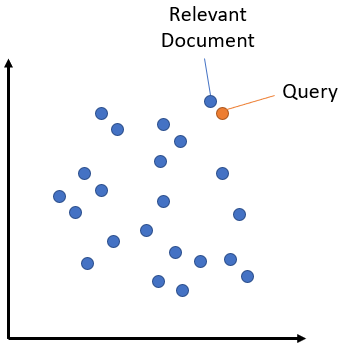

### Symmetric vs. Asymmetric Semantic Search

##### A critical distinction for your setup is symmetric vs. asymmetric semantic search:

- For symmetric semantic search your query and the entries in your corpus are of about the same length and have the same amount of content. An example would be searching for similar questions: Your query could for example be “How to learn Python online?” and you want to find an entry like “How to learn Python on the web?”. For symmetric tasks, you could potentially flip the query and the entries in your corpus.



- For asymmetric semantic search, you usually have a short query (like a question or some keywords) and you want to find a longer paragraph answering the query. An example would be a query like “What is Python” and you wand to find the paragraph “Python is an interpreted, high-level and general-purpose programming language. Python’s design philosophy …”. For asymmetric tasks, flipping the query and the entries in your corpus usually does not make sense.


##### It is critical that you choose the right model for your type of task.

- Suitable models for symmetric semantic search: https://www.sbert.net/docs/pretrained_models.html#sentence-embedding-models

- Suitable models for asymmetric semantic search: https://www.sbert.net/docs/pretrained-models/msmarco-v3.html

## Symmetric Semantic search

In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [17]:
corpus = ['A man is eating food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'A cheetah is running behind its prey.'
          ]

#Embedding them to vector space
corpus_embedding = model.encode(corpus, convert_to_tensor= True)

In [46]:
#Using cosine similarity
queries = ['A man is eating pasta.']
query_embedding = model.encode(queries, convert_to_tensor=True)
cos_score = util.cos_sim(query_embedding, corpus_embedding)
top_scores = torch.topk(cos_score,min(5, len(corpus)))
corpus[int(top_scores[1][0][0])]

'A man is eating food.'

In [48]:
list_queries = ['A man is eating pasta.', 
                'Someone in a gorilla costume is playing a set of drums.', 
                'A cheetah chases prey on across a field.']
for query in list_queries:
    q_embed = model.encode(query, convert_to_tensor=True)
    cosine_score = util.cos_sim(q_embed, corpus_embedding)
    top_score1 = torch.topk(cosine_score, min(5, len(corpus)))
    print("\n{}----->{}\n".format(query, corpus[int(top_score1[1][0][0])]))
    


A man is eating pasta.----->A man is eating food.


Someone in a gorilla costume is playing a set of drums.----->A monkey is playing drums.


A cheetah chases prey on across a field.----->A cheetah is running behind its prey.



In [50]:
util.semantic_search(query_embedding, corpus_embedding, top_k=4 )

[[{'corpus_id': 0, 'score': 0.7035484313964844},
  {'corpus_id': 1, 'score': 0.5271986126899719},
  {'corpus_id': 3, 'score': 0.18889537453651428},
  {'corpus_id': 6, 'score': 0.10469907522201538}]]

In [53]:
for query in list_queries:
    q_embed = model.encode(query, convert_to_tensor=True)
    c_scores = util.semantic_search(q_embed, corpus_embedding)
    print("{} -----> {}\n".format(query, corpus[c_scores[0][0]['corpus_id']]))

A man is eating pasta. -----> A man is eating food.

Someone in a gorilla costume is playing a set of drums. -----> A monkey is playing drums.

A cheetah chases prey on across a field. -----> A cheetah is running behind its prey.

